# Data Preprocessing

Il dataset, prima di tutto, va opportunamente elaborato per occuparsi di eventuali dati duplicati o mancanti. Inoltre dovremo separare i dati per ottenere un training e un test set.
Gli step che seguiremo saranno i seguenti:
1. Caricare i dati
2. Gestire i dati mancanti
3. Eliminare le features ridondanti
4. Dividere il dataset in training e test set
5. Normalizzare e standardizzare i dati

## Caricamento dei dati

Tramite `pandas` e il dataset fornito in .csv, carichiamo i dati all'interno di un dataset.

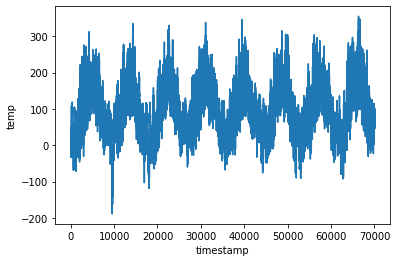

In [19]:
import pandas as pd
import numpy as np

weather_df = pd.read_csv('files/weather_dataset.csv', sep=',')  # Loading the dataset in a Pandas Dataframe
# weather_df

xs_veri = weather_df["temperature"].plot()
_ = xs_veri.set_ylabel("temp")
_ = xs_veri.set_xlabel("timestamp")

## Gestione dei dati mancanti

Con un `for-each` controlliamo, per ogni colonna, quanti sono i valori mancanti.

In [20]:
for column in weather_df.columns:
  number_of_nans_in_column = weather_df[column].isnull().sum()  # Per ogni colonna, somma il numero dei valori che sono null
  print(f"{column} -> {number_of_nans_in_column} missing values")

wind_speed -> 0 missing values
wind_direction -> 0 missing values
temperature -> 0 missing values
dew_point -> 0 missing values
air_pressure -> 0 missing values


Non essendoci valori nulli, procediamo direttamente con la prossima fase.

## Eliminazione di evenutali feature ridondanti

Si mettono in `correlazione` a due a due le feature, e in caso si eliminano feature ridondanti

<AxesSubplot:>

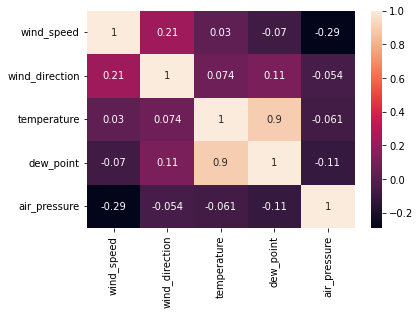

In [21]:
import seaborn as sns

correlations = weather_df.corr() # Calculating the correlations between the columns of the dataset 
sns.heatmap(correlations, annot = True)  # Displaying them in a heatmap

La temperatura e il punto di rugiada hanno una correlazione molto alta, pari a **0.9**.

Questa relazione è attribuibile alla relazione che le due feature hanno: il punto di rugiada è infatti calcolato sulla base della temperatura e dell'umidità relativa in un certo momento.
Visto che dobbiamo fare predizioni sulla temperatura, decidiamo di eliminare la feature "dew_points".

<img width="350" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Dewpoint-RH.svg/800px-Dewpoint-RH.svg.png" 
    alt="grafico_temperatura_rugiada_wikipedia" />

In [22]:
print(list(weather_df.columns))
weather_df = weather_df.drop(columns=['dew_point'])
print(list(weather_df.columns))

['wind_speed', 'wind_direction', 'temperature', 'dew_point', 'air_pressure']
['wind_speed', 'wind_direction', 'temperature', 'air_pressure']


## Divisione del data set in training e test set

Si vuole dividere il data set in 3 parti:
1. Training set, comprendente tutte le righe tranne le ultime 168
2. Test set, comprendente solo le ultime 168 righe

In [23]:
training_set = weather_df[:-168]
test_set = weather_df[-168:]

## Standardizzazione e normalizzazione dei dati

Per `facilitare la fase di apprendimento` si scalano i dati del dataset.

In [24]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

training_set_scaled = standard_scaler.fit_transform(training_set)
test_set_scaled = standard_scaler.transform(test_set)

print(f"First 3 values in training set before are:\n{training_set.head(3)}\nafter they are:\n{training_set_scaled[:3]}")
print(f"First 3 values in testing set before are:\n{test_set.head(3)}\nafter they are:\n{test_set_scaled[:3]}")

First 3 values in training set before are:
   wind_speed  wind_direction  temperature  air_pressure
0          60             260           35         10185
1          60             260           36         10183
2          60             260           37         10181
after they are:
[[ 0.8001791   0.80484909 -0.97017729  0.34613392]
 [ 0.8001791   0.80484909 -0.95547013  0.32548664]
 [ 0.8001791   0.80484909 -0.94076297  0.30483935]]
First 3 values in testing set before are:
       wind_speed  wind_direction  temperature  air_pressure
69960          30             250           45         10335
69961          30             250           47         10336
69962          40             260           57         10333
after they are:
[[-0.47870354  0.69544368 -0.82310569  1.89468038]
 [-0.47870354  0.69544368 -0.79369137  1.90500402]
 [-0.05240933  0.80484909 -0.64661977  1.87403309]]


**Questa roba qua sotto non so bene come spiegarla ma praticamente divido i due set in "roba che per fittare" e "soluzione di quello che deve predire"**

Quindi ogni 3 righe in train_x ne salvo 1 in train_y, che ipotizzo sia quella da predire
Passo successivo ripeto il procedimento traslando di 1 posizione verso l'ultima posizione l'iteratore.

In [25]:
def split_sequence(sequence, input_size):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_ix = i + input_size
        
        if end_ix > len(sequence)-1:
            break
        
        # Ogni n_step volte, salva la riga dopo come l'informazione che il modello dovrà predire
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x) 
        y.append(seq_y)

    return x,y

# ogni 'input_size' righe ne predice una
input_size = 3
train_x, train_y_tutte_variabili = split_sequence(training_set_scaled, input_size)
test_x, test_y_tutte_variabili = split_sequence(test_set_scaled, input_size)

train_y_temperatura = [train_y_tutte_variabili[x][2] for x in range(len(train_y_tutte_variabili))]
test_y_temperatura = [test_y_tutte_variabili[x][2] for x in range(len(test_y_tutte_variabili))]

print(f"First values in training set before are:\n{train_x[:3]}\nafter they are:\n{train_y_temperatura[:3]}")
print(f"First values in testing set before are:\n{test_x[:3]}\nafter they are:\n{test_y_temperatura[:3]}")

First values in training set before are:
[array([[ 0.8001791 ,  0.80484909, -0.97017729,  0.34613392],
       [ 0.8001791 ,  0.80484909, -0.95547013,  0.32548664],
       [ 0.8001791 ,  0.80484909, -0.94076297,  0.30483935]]), array([[ 0.8001791 ,  0.80484909, -0.95547013,  0.32548664],
       [ 0.8001791 ,  0.80484909, -0.94076297,  0.30483935],
       [ 0.37388489,  0.80484909, -0.92605581,  0.23257385]]), array([[ 0.8001791 ,  0.80484909, -0.94076297,  0.30483935],
       [ 0.37388489,  0.80484909, -0.92605581,  0.23257385],
       [ 0.37388489,  0.80484909, -0.91134865,  0.18095564]])]
after they are:
[-0.9260558105515959, -0.911348650320422, -0.8525200093957265]
First values in testing set before are:
[array([[-0.47870354,  0.69544368, -0.82310569,  1.89468038],
       [-0.47870354,  0.69544368, -0.79369137,  1.90500402],
       [-0.05240933,  0.80484909, -0.64661977,  1.87403309]]), array([[-0.47870354,  0.69544368, -0.79369137,  1.90500402],
       [-0.05240933,  0.80484909, -0.

Definiamo il modello di CNN che andremo ad utilizzare.

# Modello con RNN

## Definizione del modello

In [26]:
import torch

class MV_LSTM(torch.nn.Module):
    def __init__(self):
        super(MV_LSTM, self).__init__()
        self.n_features = 4
        self.n_hidden = 15
        self.n_layers = 5
    
        self.l_lstm = torch.nn.LSTM(input_size = self.n_features, hidden_size = self.n_hidden, num_layers = self.n_layers, batch_first = True)
        self.l_linear = torch.nn.Linear(self.n_hidden * input_size, 1)
    
    def forward(self, x):        
        batch_size, seq_len, _ = x.size()
        lstm_out, self.hidden = self.l_lstm(x)
        x = lstm_out.contiguous().view(batch_size,-1)
        return self.l_linear(x)

## Istanza del modello

In [27]:
import torch

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model = MV_LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
criterion = torch.nn.MSELoss()
device

device(type='cpu')

## Divisione in Tensori

In [28]:
import torch
from torch.utils.data import TensorDataset

tensor_ids_train = torch.FloatTensor(train_x)
labels_train = torch.FloatTensor(train_y_temperatura)
print(tensor_ids_train.size())
print(labels_train.size())
train_dataset = TensorDataset(tensor_ids_train, labels_train)

tensor_ids_test = torch.FloatTensor(test_x)
labels_test = torch.FloatTensor(test_y_temperatura)
test_dataset = TensorDataset(tensor_ids_test, labels_test)

torch.Size([69957, 3, 4])
torch.Size([69957])


## Creazione dei DataLoader

In [29]:
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=False, drop_last=True)
valid_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, drop_last=True)

## Definizione di Training e Validation

In [30]:
train_losses = []
valid_losses = []

def Train(epoca):
    running_loss = .0
    
    model.train()

    valori_previsti_lista = []
    valori_veri_lista = []

    for idx, (inputs,labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # print("inputs",inputs.float())
        preds = model(inputs.float())
        preds = torch.squeeze(preds)
        labels = torch.squeeze(labels)

        valori_veri_lista.append((labels.detach().numpy() * standard_scaler.scale_[2]) + standard_scaler.mean_[2])
        valori_previsti_lista.append((preds.detach().numpy() * standard_scaler.scale_[2]) + standard_scaler.mean_[2])

        loss = criterion(preds,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss

    # confronto = pd.DataFrame(np.array([valori_veri_lista, valori_previsti_lista]).transpose(), index=list(range(len(valori_veri_lista))), columns=['veri', 'predetti'])
    # confronto.to_csv("files/training_epoch_" + str(epoca) + ".csv")

    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss.detach().cpu().data.numpy())
    
    print(f'train_loss {train_loss}')
    
def Valid():
    running_loss = .0
    
    model.eval()
    
    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            preds = model(inputs.float())
            preds = torch.squeeze(preds)
            labels = torch.squeeze(labels)
            loss = criterion(preds,labels)
            running_loss += loss
            
        valid_loss = running_loss/len(valid_loader)
        valid_losses.append(valid_loss.detach().cpu().data.numpy())
        print(f'valid_loss {valid_loss}')

## Carica stato del modello

In [31]:
model.load_state_dict(torch.load('files/saved_state_of_model.pth'))

<All keys matched successfully>

## Allenamento e Validazione del modello

In [13]:
epochs = 15

for epoch in range(epochs):
    print('epochs {}/{}'.format(epoch+1,epochs))
    Train(epoch + 1)
    # Valid()

epochs 1/15
train_loss 0.5168588757514954
epochs 2/15
train_loss 0.10841171443462372
epochs 3/15
train_loss 0.09106061607599258
epochs 4/15
train_loss 0.08461463451385498
epochs 5/15
train_loss 0.07868566364049911
epochs 6/15
train_loss 0.0717390775680542
epochs 7/15
train_loss 0.06250855326652527
epochs 8/15
train_loss 0.04916750639677048
epochs 9/15
train_loss 0.0331563800573349
epochs 10/15
train_loss 0.02222498506307602
epochs 11/15
train_loss 0.017621075734496117
epochs 12/15
train_loss 0.01630253717303276
epochs 13/15
train_loss 0.01586725562810898
epochs 14/15
train_loss 0.015611503273248672
epochs 15/15
train_loss 0.015424328856170177


## Visualizzazione grafico della loss

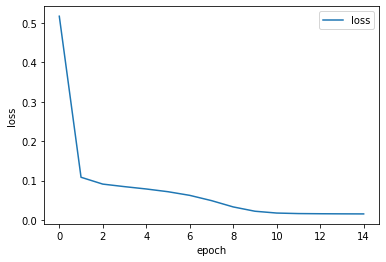

In [15]:
loss_df = pd.DataFrame(train_losses, index=list(range(len(train_losses))), columns=["loss"])

xs = loss_df.plot()
_ = xs.set_ylabel("loss")
_ = xs.set_xlabel("epoch")

## Salva stato del modello

In [14]:
torch.save(model.state_dict(), 'files/saved_state_of_model.pth')

# Predizione e valutazione del modello

## Previsione ricorsiva del modello

In [32]:
valori_veri_lista = []
valori_veri_lista.append((test_set_scaled[:,2] * standard_scaler.scale_[2]) + standard_scaler.mean_[2])

In [33]:
from math import sqrt
from torch import nn
from array import array

evalutation_loss = nn.MSELoss()

last_3_rows_training = [training_set_scaled[-3:]]

def evaluate_model(model, first_input, test):
	predictions = list()
	input = first_input

	prima_predizione = model(torch.FloatTensor(input))
	prima_predizione = torch.squeeze(prima_predizione).cpu().detach().numpy().tolist()
	predictions.append(prima_predizione)

	test_set_scaled[0,2] = prima_predizione
	input = [np.delete( np.append(input[0], [test_set_scaled[0]], axis=0), 0, 0)]

	for i in range(len(test) - 1):

		with torch.no_grad():
			predizione = model(torch.FloatTensor(input))
			predizione = torch.squeeze(predizione).cpu().detach().numpy().tolist()

			test_set_scaled[1 + i,2] = predizione

			input = [np.delete( np.append(input[0], [test_set_scaled[1 + i]], axis=0), 0, 0)]
			predictions.append(predizione)
	return predictions

recursive_pred = evaluate_model(model, last_3_rows_training, test_set_scaled)

## Valutazione del modello

$ RMSE = \sqrt{\frac {
\sum_{i = 1}^{n} {(predicted_i - actual_i)^2}
}{n} } $ 

<AxesSubplot:>

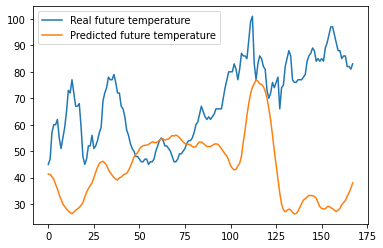

In [34]:
valori_previsti_lista = []

valori_previsti_lista.append((np.float64(recursive_pred) * standard_scaler.scale_[2]) + standard_scaler.mean_[2])

result = pd.DataFrame({'Real future temperature':valori_veri_lista[0], 'Predicted future temperature':valori_previsti_lista[0] }, index=list(range(len(valori_veri_lista[0]))))

result.plot()

In [35]:
result.to_csv("files/veri_e_predetti.csv")

result[50:]

,Real future temperature,Predicted future temperature
50,47.0,50.778276
51,46.0,51.656575
52,46.0,52.068222
53,47.0,52.240992
54,47.0,52.250378
...,...,...
163,86.0,31.330952
164,82.0,33.035909
165,82.0,34.217282
166,81.0,35.935499
